# What If The Spanish Flu Had The Same Impact as The Black Death?


A Simulation by Anna Letcher Hartman and Bennett Taylor



Our project posed the question “What would happen if the Spanish Flu held the same effects as the Black Death?” What would the current population look like, and how would the population drop carry through the measured years? The model could demonstrate the effectiveness of the vaccines in reducing infection rates, and put historical information in a more easily understood context. For the model to be feasible we had to make the assumptions listed bellow.
Assumptions:
1.	 The biggest effect on birth and death rate around the time of the black plague was the black plague.
From the research we did this appears to be true, however without going much deeper it is impossible to know for certain.
2.	If 1/3 to 1/2 of the population of America died during the Spanish flu outbreak the rest of the events of the century would progress relatively unchanged
This assumption is vital to the feasibility of our model. Including it would be at the very least a PHD level problem. However it is blatantly false, the US would not have been able to join WW2 the roaring twenties would likely have changed in character severally if they happened at all. In short it would have completely changed the cores of US history.
3.	The population decline during the epidemic would be relatively linear
This is a simplification, but a decent assumption since our goal is just to kill a certain percent of the population.
4.	The growth curve accuracy 1900-1918 is unimportant to the models overall accuracy.
 As long as the numeric population value at 1900 and 1918 are accurate, the changes made in the model by the introduced values will still be significant.




### Reading and Ploting US Census Data from 1901 to 1990

In [1]:
%matplotlib inline

from modsim import *
from pandas import read_csv


In [2]:
filename = 'data/Census_Data.csv'
print (filename)
tables = read_csv(filename, header=0, index_col=0, decimal='M')
tables.columns = ['Population', 'Change', 'Rate']

data/Census_Data.csv


In [3]:
def plot_results(census, timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(census, '--', label='US Census')
  #  plot(un, '--', label='UN DESA')
    if len(timeseries):
        plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='US population (billions)',
             title=title)

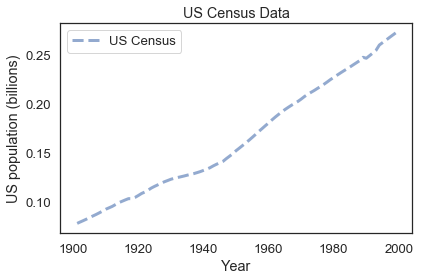

In [4]:
popData = tables.Population / 1e9
#change = tables.Change / 1e9
empty = TimeSeries()
plot_results(popData, empty, 'US Census Data')

### Defining Update Function

##### Defing global variabls and system object:
p_0 and init define the initial population of the simulation, the Alpha and Beta arrays hold a variety of constants that we use to fine tune out quadratick update function.


In [5]:
p_0 = get_last_value(popData)
init = State(babyboy=p_0)
alpha_array_global = linspace(0,0.025,20)
beta_array = linspace(0,-0.0018,20)

Initializing System Object

In [6]:

system = System(birth_rate = 0.0292,
                #1918 birthrate (does not change, black death did not affect birthrate)
                death_rate =.0172,
                death_rate1= .0392,
                #death rate in 1900
                death_rate2 = .175, #code do be duplicated and run alongside curret, replacing .028 with 
                
                t_0 = 1900,
                t_end = 2018,
                init=init,
                alpha_array= [0.019, 0.01578947, 0.01],
                beta_array= [-1.23157895*10**-3, -1.13684211*10**-3, -1.04210526*10**-3])

##### Update Function
We used a set of quadratick equations to model population growth after 1922, during the plage years, between 1918 and 1922, and in the short years before that we uesed a liner model. In this model we used the actual spanish flue updats so we could tweek our model to fit the Data.

In [7]:
def update_func1(state, t, system):

    births = system.birth_rate * state.babyboy #constant birthrate throughout, in accordance with historic data
   
    #change death rates at start of Spanish Flu
    
    if 1918 < t < 1922: #area of affect: set to Spanish Flu death rate
        deaths = system.death_rate1 * state.babyboy
        babyboy = state.babyboy + births - deaths
        return State(babyboy=babyboy)
   
    if 1922< t <1950: #model of population before babyboom
        net_growth = system.alpha_array[0] * state.babyboy + system.beta_array[0] * state.babyboy**2
        #net_growth = 0.0022675*t**2+2.6804*t+300.760
        babyboy = state.babyboy + net_growth
        return State(babyboy=babyboy)
 
    if 1966 > t > 1950: #model of population during babyboom
        net_growth = system.alpha_array[1] * state.babyboy + system.beta_array[1] * state.babyboy**2
        babyboy = state.babyboy + net_growth
        return State(babyboy=babyboy)
    
    if t > 1966: #model of population after babyboom
        net_growth = system.alpha_array[2] * state.babyboy + system.beta_array[2] * state.babyboy**2
        babyboy = state.babyboy + net_growth
        return State(babyboy=babyboy)
    
    else: #model of population before SF: linear for numeric accuracy
        deaths = system.death_rate * state.babyboy
        babyboy = state.babyboy + births - deaths
        return State(babyboy=babyboy)

In [8]:
state = update_func1(init, system.t_0, system) #sets up recursion variable

Running the Model

In [9]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.babyboy
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.babyboy
        
    return results

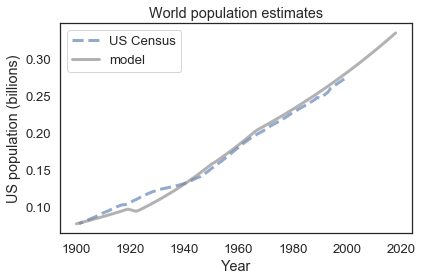

In [14]:
results = run_simulation(system, update_func1); #setting run_simulation result to be saved as "results"
plot_results(popData, results, 'World population estimates')

### New Update Function and Results
In this version we used the Black Plage death rate.

In [12]:
def update_func2(state, t, system):

    #print(type(state.babyboy))
    births = system.birth_rate * state.babyboy
      
    #change death rates at start of Spanish Flu
    
    if 1918 < t < 1922:
        deaths = system.death_rate2 * state.babyboy
        babyboy = state.babyboy + births - deaths
        return State(babyboy=babyboy)
   
    if 1922< t <1950:
        net_growth = system.alpha_array[0] * state.babyboy + system.beta_array[0] * state.babyboy**2
        #net_growth = 0.0022675*t**2+2.6804*t+300.760
        babyboy = state.babyboy + net_growth
        return State(babyboy=babyboy)
 
    if 1966 > t > 1950:
        net_growth = system.alpha_array[1] * state.babyboy + system.beta_array[1] * state.babyboy**2
        babyboy = state.babyboy + net_growth
        return State(babyboy=babyboy)
    if t > 1966:
        net_growth = system.alpha_array[2] * state.babyboy + system.beta_array[2] * state.babyboy**2
        babyboy = state.babyboy + net_growth
        return State(babyboy=babyboy)
    else:
        deaths = system.death_rate * state.babyboy
        babyboy = state.babyboy + births - deaths
        return State(babyboy=babyboy)

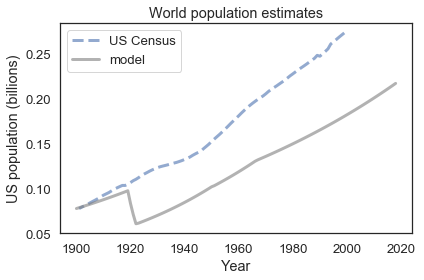

In [15]:
results = run_simulation(system, update_func2);
plot_results(popData, results, 'World population estimates')


Results: Our simulation delivered a model in line with our preconceived ideas. The population dropped significantly between 1918 and 1920, leaving a little under a third of the population dead. The drop in population continued to hold a deficit through the remaining years. According to our model, he 2018 population would be 216.635,000, as opposed to the originally projected 2018 population of 334.7 million, or the currently recorded population of 325.7 million. This is a much higher discrepancy than we theorised. We thought the population would begin to catch up if not return near the actual value. If we were to redo our simulation we would make our data fit better from 1901 to 1918. 